In [1]:
import tensorflow as tf
from tensorflow import keras as keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras. optimizers import Adam, RMSprop, SGD
from keras.regularizers import L1, L2, L1L2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
from keras.callbacks import History

dataset= mnist.load_data()
(x_train, y_train), (x_test,y_test) = dataset #Son las variables separadas de los datos de entrenamiento y pruebas

#Ahora aplanamos las imágenes y convertimos en punto flotante
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_trainv = x_train.astype('float32')
x_testv = x_test.astype('float32')

lr = 0.001  #learning rate
num_clases = 10
y_trainc = keras.utils.to_categorical(y_train, num_clases)
y_testc = keras.utils.to_categorical(y_test, num_clases)


11490434/11490434 [==============================] - 0s 0us/step


In [3]:
exp_L1L2 = Sequential()
exp_L1L2.add(Dense(512, activation='sigmoid', input_shape=(784,), kernel_regularizer=regularizers.L1L2(l1=0.01, l2=0.01)))
exp_L1L2.add(Dense(10,activation='softmax') )

exp_L1L2.summary()

exp_L1L2.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=lr), metrics=['accuracy'])
history = exp_L1L2.fit(x_trainv, y_trainc, batch_size = 10, epochs = 10, verbose=1, validation_data=(x_testv, y_testc))


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
6000/6000 [==============================] - 48s 8ms/step - loss: 7.8583 - accuracy: 0.6998 - val_loss: 7.5967 - val_accuracy: 0.6647
Epoch 2/10
6000/6000 [==============================] - 44s 7ms/step - loss: 7.5979 - accuracy: 0.6908 - val_loss: 7.3003 - val_accuracy: 0.6700
Epoch 3/10
6000/6000 [==============================] - 44s 7ms/step - loss: 8.0085 - accuracy: 0.6998 - val_loss: 8.2469 - 

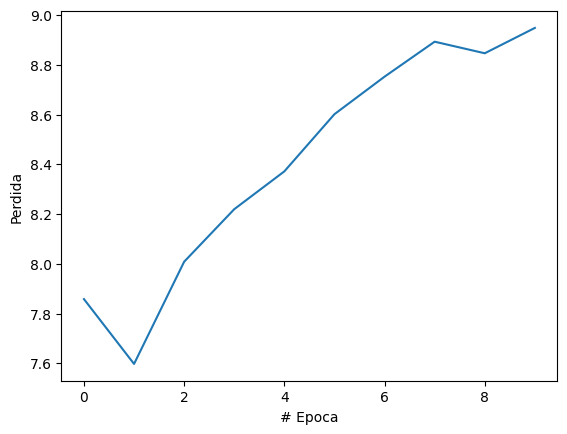

In [4]:
# Gráfica de pérdida-epoca del experimento L1-L2
plt.xlabel("# Epoca")
plt.ylabel("Perdida")
plt.plot(history.history["loss"])

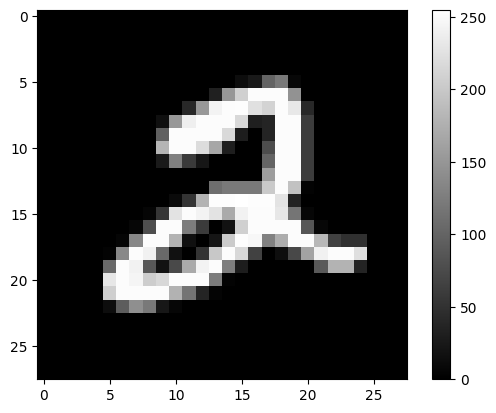

In [5]:
import matplotlib.pyplot as plt
image = x_train[5].reshape((28, 28))
plt.figure()
plt.imshow(image, cmap="gray")#número de imagen en el mnist
plt.colorbar()
plt.grid(False)
plt.show()


In [6]:
score = exp_L1L2.evaluate(x_testv, y_testc, verbose=1) #evaluar la eficiencia del modelo
print(score)
a=exp_L1L2.predict(x_testv) #predicción de la red entrenada
print(a.shape)
print(a[1])
print("resultado correcto:")
print(y_testc[1])     #si sale :)

313/313 [==============================] - 1s 3ms/step - loss: 8.5094 - accuracy: 0.6883
[8.509361267089844, 0.6883000135421753]
313/313 [==============================] - 1s 2ms/step
(10000, 10)
[9.1438547e-02 3.3454918e-03 6.7501567e-02 6.9127107e-01 2.7771214e-06
 7.4405551e-02 1.0364177e-02 9.4551756e-04 6.0458843e-02 2.6641355e-04]
resultado correcto:
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
